In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
# Import the requests library.
import requests
import json

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

def latitudes(size):
    latitudes = []
    x = 0
    while x < 15:
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)
latitudes

ImportError: cannot import name 'weather_api_key' from 'config' (C:\Users\rdsm1\Documents\GitHub\World_Weather_Analysis\Classroom\config.py)

In [2]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

11.9 µs ± 22.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#the zip funciton each pair of lats and lngs having the same index in their respective array into a tuple
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(16.516159551018987, 125.43655313872824),
 (-86.02610448330361, 39.257609861142214),
 (-1.3429413370603953, -133.6546283059124),
 (66.26532462923552, 129.58548607039256),
 (84.0287296646386, 153.94556946033953),
 (48.750749623307314, -118.37312437891276),
 (-43.41416574606343, -118.68395864714068),
 (67.83147988771839, 5.074922494146421),
 (-30.704429729463804, -150.08550246416223),
 (44.4137430098574, 105.48553971796878),
 (36.49305491724651, 116.1446349045919),
 (-89.75854313371721, 27.485966556053796),
 (83.32435229712337, -174.93601198233887),
 (-80.44029187355213, 171.6802900269189),
 (-13.926241670838664, -13.829945476235082),
 (85.50828318963366, -147.2466711017853),
 (-0.4434488101777134, -92.25416623666193),
 (-31.741662054755267, 134.57224303692078),
 (-81.53028756017633, 56.53674377826462),
 (-83.91429010480798, 129.77860093847107),
 (-45.9674896187813, 154.70519234650789),
 (15.477909910324797, 129.55260751956223),
 (41.88975349464536, -148.5515562539016),
 (56.70294728278

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?q="
#city="Boston"
#city_url= url+ city+ "&appid=" + weather_api_key
#city_weather = requests.get(city_url)
# Get the JSON text of the 'Get' request.
#city_weather.json()
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
#datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [16]:
set_count=0
record_count=0
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes "%" to show divide
    if (i / 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + city.replace(" ","+")+"&appid=" + weather_api_key

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 0 of Set 0 | albany
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 0 | cabot
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 0 | tasiilaq
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 0 | san vicente
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 0 | tegal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 0 | te anau
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 0 | rikitea
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 0 | tessalit
-----------------------------
Data Retrieval Complete    

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 63 of Set 0 | hamilton
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 64 of Set 0 | raudeberg
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 65 of Set 0 | kamenka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 66 of Set 0 | port lincoln
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 67 of Set 0 | puerto ayora
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 68 of Set 0 | helong
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 69 of Set 0 | walvis bay
-----------------------------
Data Retrieval Complete      
---------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 124 of Set 0 | nagorsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 125 of Set 0 | turayf
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 126 of Set 0 | zhigansk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 127 of Set 0 | bontang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 128 of Set 0 | sakaiminato
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 129 of Set 0 | zhaodong
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 130 of Set 0 | geresk
City not found. Skipping...
-----------------------------
Data Retrieval Comple

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 185 of Set 0 | chara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 186 of Set 0 | arraial do cabo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 187 of Set 0 | bac lieu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 188 of Set 0 | mandalgovi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 189 of Set 0 | duartina
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 190 of Set 0 | grand river south east
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 191 of Set 0 | vaitape
-----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 247 of Set 0 | west bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 248 of Set 0 | waipawa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 249 of Set 0 | severo-kurilsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 250 of Set 0 | shikhazany
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 251 of Set 0 | vicosa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 252 of Set 0 | harnosand
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 253 of Set 0 | kavieng
-----------------------------
Data Retrieval Complete      
-----------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 308 of Set 0 | kangasala
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 309 of Set 0 | oxbow
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 310 of Set 0 | hirara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 311 of Set 0 | agadez
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 312 of Set 0 | cabedelo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 313 of Set 0 | itarema
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 314 of Set 0 | srednekolymsk
-----------------------------
Data Retrieval Complete      
------------------

Processing Record 372 of Set 0 | loralai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 373 of Set 0 | clyde river
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 374 of Set 0 | ostrovnoy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 375 of Set 0 | camacha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 376 of Set 0 | jacqueville
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 377 of Set 0 | peniche
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 378 of Set 0 | sibiti
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 379 of Set 0 | shieli
-----------------------------
Data

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 434 of Set 0 | marawi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 435 of Set 0 | gornja radgona
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 436 of Set 0 | psebay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 437 of Set 0 | obo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 438 of Set 0 | okhotsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 439 of Set 0 | aklavik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 440 of Set 0 | izvoarele
-----------------------------
Data Retrieval Complet

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 495 of Set 0 | turukhansk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 496 of Set 0 | roi et
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 497 of Set 0 | abu dhabi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 498 of Set 0 | honningsvag
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 499 of Set 0 | san felipe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 500 of Set 0 | sergokala
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 501 of Set 0 | thilogne
City not found. Skipping...
-----------------------------
Data Retrie

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 558 of Set 0 | ust-kamchatsk
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 559 of Set 0 | chirala
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 560 of Set 0 | nara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 561 of Set 0 | canaries
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 562 of Set 0 | valparaiso
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 563 of Set 0 | tezu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 564 of Set 0 | ndele
-----------------------------
Data Retrieval Complete

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,293.51,79,0,2.13,US,2021-07-24 00:34:30
1,Cabot,34.9745,-92.0165,305.18,58,1,2.06,US,2021-07-24 00:41:35
2,Tasiilaq,65.6145,-37.6368,278.24,99,100,1.56,GL,2021-07-24 00:34:38
3,San Vicente,-26.6167,-54.1333,287.36,66,0,1.38,AR,2021-07-24 00:38:40
4,Tegal,-6.8694,109.1402,299.90,71,7,1.96,ID,2021-07-24 00:43:14
5,Te Anau,-45.4167,167.7167,282.97,75,13,0.63,NZ,2021-07-24 00:33:00
6,Rikitea,-23.1203,-134.9692,294.57,59,6,6.11,PF,2021-07-24 00:34:43
7,Tessalit,20.1986,1.0114,305.09,32,100,3.91,ML,2021-07-24 00:37:14
8,Vuktyl,63.8567,57.3094,285.28,63,98,4.16,RU,2021-07-24 00:43:15
9,Castro,-24.7911,-50.0119,283.82,78,0,1.60,BR,2021-07-24 00:35:11


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

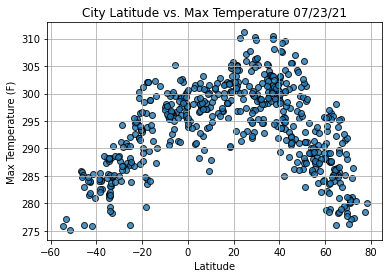

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

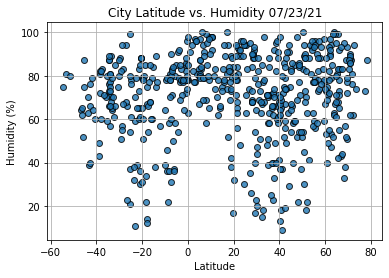

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

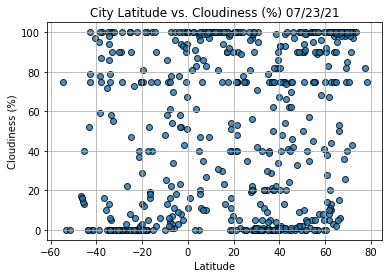

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

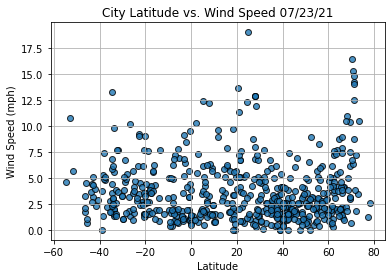

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

y = -0.45x + 92.94
The p-value is: 0.011


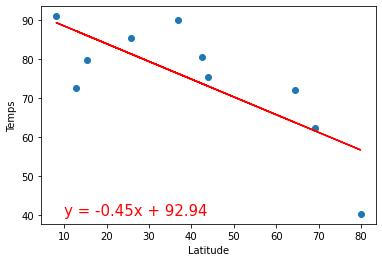

In [24]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
import matplotlib.pyplot as plt
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]
#create the scatter plot for the values 
plt.scatter(lats, temps)
#create the linear regression plot 
plt.plot(lats,regress_values,"r")
plt.xlabel("Latitude")
plt.ylabel("Temps")
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [64]:
from scipy.stats import linregress
# Call the function.
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.title(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

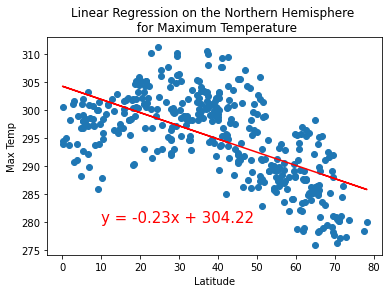

In [66]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,280))


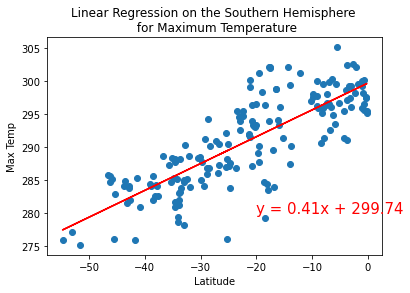

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-20,280))

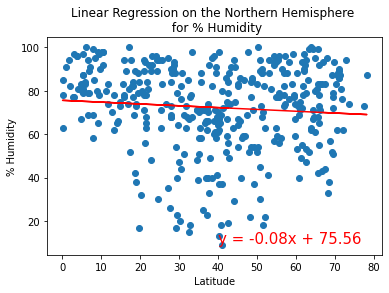

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

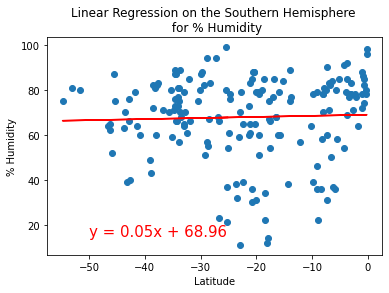

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

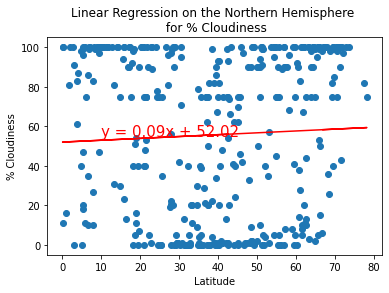

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

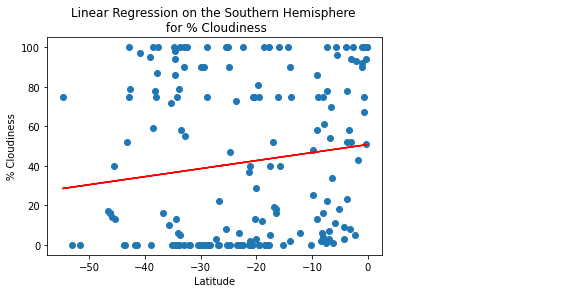

In [76]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

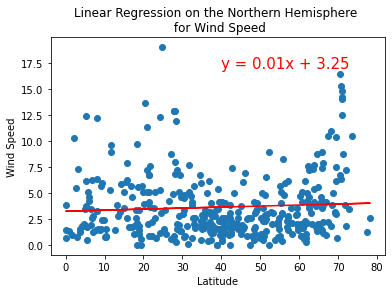

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,17))

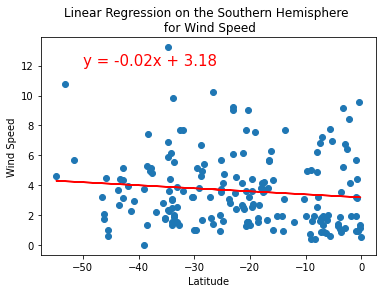

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,12))